In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
nov_april_csv = pd.read_csv('gdrive/My Drive/IMT 575 Project/Nov-April.csv')

<ipython-input-81-6a0bb41937b8>:1: DtypeWarning:

Columns (0,6,9,10) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
nov_april_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478347 entries, 0 to 478346
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     478309 non-null  object 
 1   Date           478329 non-null  object 
 2   Tweet          478295 non-null  object 
 3   Url            478266 non-null  object 
 4   User           478266 non-null  object 
 5   UserCreated    478266 non-null  object 
 6   UserVerified   478266 non-null  object 
 7   UserFollowers  478266 non-null  float64
 8   UserFriends    478266 non-null  float64
 9   Retweets       478240 non-null  object 
 10  Likes          478266 non-null  object 
 11  Location       358836 non-null  object 
 12  Description    455384 non-null  object 
dtypes: float64(2), object(11)
memory usage: 47.4+ MB


**Structures Description of Dataset**

This dataset contains tweets starting from November 2022 to 8th April, 2023 containing the keywords keywords #ChatGPT
The dataset contains 12 columns which are:

*   Date - Date of the tweet
*   Tweet - Contents of the tweet
*   Url - Link for the original tweet
*   User - UserName of the person who tweeted.
*   UserCreated - Account creation date
*   UserVerified - Boolean field for verified user or not.
*   UserFollowers - Follower count of user.
*   UserFriends - Friends count of user.
*   Retweet - Count of retweets
*   Likes - Count of Likes
*   Location - Location of User
*   UserDescription - Description of user


Reference: https://www.kaggle.com/datasets/manishabhatt22/tweets-onchatgpt-chatgpt



In [ ]:
nov_april_csv = nov_april_csv.drop(columns=["UserCreated", "Unnamed: 0"], axis=1)

In [ ]:
nov_april_csv.head(10)

,Date,Tweet,Url,User,UserVerified,UserFollowers,UserFriends,Retweets,Likes,Location,Description
0,2023-04-08 03:33:13+00:00,#ChatGPT If only there were a movie or somethi...,https://twitter.com/kirbydjohnson/status/16445...,kirbydjohnson,False,50.0,76.0,0.0,0,NaN,NaN
1,2023-04-08 03:32:16+00:00,"Workshop Description: In this workshop, you wi...",https://twitter.com/UniversityWeb/status/16445...,UniversityWeb,False,9056.0,387.0,0.0,0,NaN,"University webinars, speech videos, & news for..."
2,2023-04-08 03:32:05+00:00,New Post at AiNewsDrop!\n\nChatGPT is a doctor...,https://twitter.com/AiNewsDrop/status/16445436...,AiNewsDrop,False,276.0,313.0,0.0,0,NaN,I'm up almost 24/7 hunting for AI News\n\nWith...
3,2023-04-08 03:31:08+00:00,OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...,https://twitter.com/tubeblogger/status/1644543...,tubeblogger,False,312.0,293.0,0.0,0,The Internet,"Exploring the Best Of The Web. Tech, Games, Ar..."
4,2023-04-08 03:30:51+00:00,"""Classical art"" is struggling - not changed th...",https://twitter.com/majorradic/status/16445432...,majorradic,False,522.0,684.0,0.0,2,Beograd Navodni,Mediji i milosrdje\n\n ...
5,2023-04-08 03:30:00+00:00,Alibaba invites businesses to trial 'ChatGPT r...,https://twitter.com/gadgetsnow/status/16445430...,gadgetsnow,True,90392.0,56.0,0.0,0,New Delhi,The official technology news website of The Ti...
6,2023-04-08 03:28:59+00:00,Trying to stop students from using #AI and #ch...,https://twitter.com/Sherab_Taye/status/1644542...,Sherab_Taye,False,338.0,53.0,0.0,0,World,Musician // Thinker // Metaphysical Dandy // f...
7,2023-04-08 03:28:31+00:00,I Asked ChatGPT's AI Chatbot How Can I Earn Cr...,https://twitter.com/cryptoccentral/status/1644...,cryptoccentral,False,1.0,2.0,0.0,2,United States,Get the latest updates and insights on the cry...
8,2023-04-08 03:26:16+00:00,Gugenka team has created a fun Customize new p...,https://twitter.com/kiradragonp/status/1644542...,kiradragonp,False,895.0,635.0,0.0,1,Canada,"Mad Scientist,Overseas Partnership,Tech Direct..."
9,2023-04-08 03:23:05+00:00,https://t.co/cDAXMevBtr\nThe race to develop #...,https://twitter.com/CDOTrends/status/164454134...,CDOTrends,False,1051.0,2439.0,0.0,1,Hong Kong,Today's insights for digital leaders of tomorr...


In [ ]:
# Convert the 'date' column to a datetime object
nov_april_csv['Date'] = pd.to_datetime(nov_april_csv['Date'], errors='coerce')

# Extract the date component and assign it to the 'date' column
nov_april_csv['Date'] = nov_april_csv['Date'].dt.date

# again convert this extraced component to datetime object
nov_april_csv['Date'] = pd.to_datetime(nov_april_csv['Date'])

In [ ]:
# Dates with highest tweet counts
top_tweet_dates = nov_april_csv.groupby(pd.Grouper(key='Date', freq='D')).size().reset_index(name='count').sort_values(by='count', ascending=False)
print(top_tweet_dates.head(10))

          Date  count
69  2023-02-07   8696
70  2023-02-08   7143
6   2022-12-06   6169
105 2023-03-15   6135
71  2023-02-09   6067
5   2022-12-05   5712
114 2023-03-24   5679
72  2023-02-10   5495
106 2023-03-16   5479
68  2023-02-06   5472


In [ ]:
import plotly.express as px
# Number of tweets per day
tweets_by_day = nov_april_csv.groupby(pd.Grouper(key='Date', freq='D')).size().reset_index(name='count').sort_values(by='count', ascending=False)
tweets_by_day.columns = ['Date', 'count']
tweets_by_day.head(10)
fig2 = px.bar(tweets_by_day, x='Date', y='count', title='Number of Tweets per Day', color = 'count', height=800, width=1200)
fig2.update_xaxes(tickangle=45, tickformat='%Y-%m-%d')
#ax.set_xlim([datetime.date(2014, 1, 26), datetime.date(2014, 2, 1)])
fig2.show()

In [ ]:
# Number of tweets per week (bar plot)
tweets_by_week = nov_april_csv.groupby(pd.Grouper(key='Date', freq='W-MON',label='left')).size().reset_index()
tweets_by_week.columns = ['week', 'count']
tweets_by_week['week_start'] = tweets_by_week['week'].dt.strftime('%Y-%m-%d')
tweets_by_week['week_end'] = (tweets_by_week['week'] + pd.Timedelta(days=6)).dt.strftime('%Y-%m-%d')
fig = px.bar(tweets_by_week, x='week_start', y='count', title='Number of Tweets per Week', height=500, width=1000, color = 'count')
fig.update_xaxes(tickangle=45)
fig.show()

In [ ]:
tweets_by_month = nov_april_csv.groupby(pd.Grouper(key='Date', freq='M',label='left')).size().reset_index(name='count')
fig = px.bar(tweets_by_month, x='Date', y='count', title='Number of Tweets by Month', height=700, width=700, color = 'count')
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Count')
fig.show()

In [ ]:
#I'll create a copy of my dataframe, just incase I mess it up :p
df = nov_april_csv.copy(deep = True)

In [ ]:
print("Length: ",len(nov_april_csv))
print("Shape: ",df.shape)

Length:  478347
Shape:  (478347, 13)


In [ ]:
# check for missing values
print(df.isnull().sum())

Unnamed: 0           38
Date                 81
Tweet                52
Url                  81
User                 81
UserCreated          81
UserVerified         81
UserFollowers        81
UserFriends          81
Retweets            107
Likes                81
Location         119511
Description       22963
dtype: int64


In [ ]:
df.dropna(subset=['Date', 'User'], inplace=True)

In [ ]:
print(df.isnull().sum())

Unnamed: 0            0
Date                  0
Tweet                 0
Url                   0
User                  0
UserCreated           0
UserVerified          0
UserFollowers         0
UserFriends           0
Retweets              0
Likes                 0
Location         119401
Description       22853
dtype: int64


In [ ]:
# Checking the number of unique values in each column
for col in df.columns:
    print(col, ":", df[col].nunique())

Unnamed: 0 : 478237
Date : 130
Tweet : 473653
Url : 478237
User : 199311
UserCreated : 199243
UserVerified : 4
UserFollowers : 23864
UserFriends : 9658
Retweets : 603
Likes : 1093
Location : 44270
Description : 184338


In [ ]:
import re

# One preprocessing function to rule them all(almost!)
def pre_process(text):

    text = str(text)
    # Remove links
    text = re.sub('http://\S+|https://\S+', '', text)
    text = re.sub('http[s]?://\S+', '', text)
    text = re.sub(r"http\S+", "", text)

    text = re.sub('&amp', 'and', text)
    text = re.sub('&lt', '<', text)
    text = re.sub('&gt', '>', text)

    # Remove new line characters
    text = re.sub('[\r\n]+', ' ', text)

    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    # text = re.sub(r'@\w+', lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x.group(0)), text) #Keeps the character trailing @
    # text = re.sub(r'#\w+', lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x.group(0)), text) #Keeps the character trailing #

    # Remove multiple space characters
    text = re.sub('\s+',' ', text)

    # Convert to lowercase
    text = text.lower()
    return text

In [ ]:
df.head(10)

,Unnamed: 0,Date,Tweet,Url,User,UserCreated,UserVerified,UserFollowers,UserFriends,Retweets,Likes,Location,Description
0,0,2023-04-08,#ChatGPT If only there were a movie or somethi...,https://twitter.com/kirbydjohnson/status/16445...,kirbydjohnson,2012-07-29 22:57:46+00:00,False,50.0,76.0,0.0,0,NaN,NaN
1,1,2023-04-08,"Workshop Description: In this workshop, you wi...",https://twitter.com/UniversityWeb/status/16445...,UniversityWeb,2013-01-13 20:18:16+00:00,False,9056.0,387.0,0.0,0,NaN,"University webinars, speech videos, & news for..."
2,2,2023-04-08,New Post at AiNewsDrop!\n\nChatGPT is a doctor...,https://twitter.com/AiNewsDrop/status/16445436...,AiNewsDrop,2022-01-19 06:25:45+00:00,False,276.0,313.0,0.0,0,NaN,I'm up almost 24/7 hunting for AI News\n\nWith...
3,3,2023-04-08,OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...,https://twitter.com/tubeblogger/status/1644543...,tubeblogger,2013-06-25 01:42:59+00:00,False,312.0,293.0,0.0,0,The Internet,"Exploring the Best Of The Web. Tech, Games, Ar..."
4,4,2023-04-08,"""Classical art"" is struggling - not changed th...",https://twitter.com/majorradic/status/16445432...,majorradic,2011-12-12 01:29:15+00:00,False,522.0,684.0,0.0,2,Beograd Navodni,Mediji i milosrdje\n\n ...
5,5,2023-04-08,Alibaba invites businesses to trial 'ChatGPT r...,https://twitter.com/gadgetsnow/status/16445430...,gadgetsnow,2010-07-29 10:32:28+00:00,True,90392.0,56.0,0.0,0,New Delhi,The official technology news website of The Ti...
6,6,2023-04-08,Trying to stop students from using #AI and #ch...,https://twitter.com/Sherab_Taye/status/1644542...,Sherab_Taye,2010-05-10 12:40:40+00:00,False,338.0,53.0,0.0,0,World,Musician // Thinker // Metaphysical Dandy // f...
7,7,2023-04-08,I Asked ChatGPT's AI Chatbot How Can I Earn Cr...,https://twitter.com/cryptoccentral/status/1644...,cryptoccentral,2023-01-27 00:12:12+00:00,False,1.0,2.0,0.0,2,United States,Get the latest updates and insights on the cry...
8,8,2023-04-08,Gugenka team has created a fun Customize new p...,https://twitter.com/kiradragonp/status/1644542...,kiradragonp,2010-07-03 19:13:52+00:00,False,895.0,635.0,0.0,1,Canada,"Mad Scientist,Overseas Partnership,Tech Direct..."
9,9,2023-04-08,https://t.co/cDAXMevBtr\nThe race to develop #...,https://twitter.com/CDOTrends/status/164454134...,CDOTrends,2018-03-10 10:19:45+00:00,False,1051.0,2439.0,0.0,1,Hong Kong,Today's insights for digital leaders of tomorr...


In [ ]:
df['processed_content'] = df['Tweet'].apply(pre_process)

In [ ]:
df.head(10)

,Unnamed: 0,Date,Tweet,Url,User,UserCreated,UserVerified,UserFollowers,UserFriends,Retweets,Likes,Location,Description,processed_content
0,0,2023-04-08,#ChatGPT If only there were a movie or somethi...,https://twitter.com/kirbydjohnson/status/16445...,kirbydjohnson,2012-07-29 22:57:46+00:00,False,50.0,76.0,0.0,0,NaN,NaN,if only there were a movie or something that ...
1,1,2023-04-08,"Workshop Description: In this workshop, you wi...",https://twitter.com/UniversityWeb/status/16445...,UniversityWeb,2013-01-13 20:18:16+00:00,False,9056.0,387.0,0.0,0,NaN,"University webinars, speech videos, & news for...","workshop description: in this workshop, you wi..."
2,2,2023-04-08,New Post at AiNewsDrop!\n\nChatGPT is a doctor...,https://twitter.com/AiNewsDrop/status/16445436...,AiNewsDrop,2022-01-19 06:25:45+00:00,False,276.0,313.0,0.0,0,NaN,I'm up almost 24/7 hunting for AI News\n\nWith...,new post at ainewsdrop! chatgpt is a doctor no...
3,3,2023-04-08,OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...,https://twitter.com/tubeblogger/status/1644543...,tubeblogger,2013-06-25 01:42:59+00:00,False,312.0,293.0,0.0,0,The Internet,"Exploring the Best Of The Web. Tech, Games, Ar...",openai’s gpt-4 just got supercharged!
4,4,2023-04-08,"""Classical art"" is struggling - not changed th...",https://twitter.com/majorradic/status/16445432...,majorradic,2011-12-12 01:29:15+00:00,False,522.0,684.0,0.0,2,Beograd Navodni,Mediji i milosrdje\n\n ...,"""classical art"" is struggling - not changed th..."
5,5,2023-04-08,Alibaba invites businesses to trial 'ChatGPT r...,https://twitter.com/gadgetsnow/status/16445430...,gadgetsnow,2010-07-29 10:32:28+00:00,True,90392.0,56.0,0.0,0,New Delhi,The official technology news website of The Ti...,alibaba invites businesses to trial 'chatgpt r...
6,6,2023-04-08,Trying to stop students from using #AI and #ch...,https://twitter.com/Sherab_Taye/status/1644542...,Sherab_Taye,2010-05-10 12:40:40+00:00,False,338.0,53.0,0.0,0,World,Musician // Thinker // Metaphysical Dandy // f...,trying to stop students from using and is like...
7,7,2023-04-08,I Asked ChatGPT's AI Chatbot How Can I Earn Cr...,https://twitter.com/cryptoccentral/status/1644...,cryptoccentral,2023-01-27 00:12:12+00:00,False,1.0,2.0,0.0,2,United States,Get the latest updates and insights on the cry...,i asked chatgpt's ai chatbot how can i earn cr...
8,8,2023-04-08,Gugenka team has created a fun Customize new p...,https://twitter.com/kiradragonp/status/1644542...,kiradragonp,2010-07-03 19:13:52+00:00,False,895.0,635.0,0.0,1,Canada,"Mad Scientist,Overseas Partnership,Tech Direct...",gugenka team has created a fun customize new p...
9,9,2023-04-08,https://t.co/cDAXMevBtr\nThe race to develop #...,https://twitter.com/CDOTrends/status/164454134...,CDOTrends,2018-03-10 10:19:45+00:00,False,1051.0,2439.0,0.0,1,Hong Kong,Today's insights for digital leaders of tomorr...,the race to develop models with instruction-f...


In [ ]:
print(df[["Tweet", "processed_content"]])

                                                    Tweet  \
3       OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...   
4       "Classical art" is struggling - not changed th...   
5       Alibaba invites businesses to trial 'ChatGPT r...   
6       Trying to stop students from using #AI and #ch...   
7       I Asked ChatGPT's AI Chatbot How Can I Earn Cr...   
...                                                   ...   
478342  @OpenAI 's new #ChatGPT is insane\nPrompt: An ...   
478343  ChatGPT first look - https://t.co/16K2NlmOoY. ...   
478344  OK so @OpenAI's new #ChatGPT can basically jus...   
478345  Just in! \n#ChatGPT - research early stage GPT...   
478346  #ai Models are set to become the search engine...   

                                        processed_content  
3                  openai’s gpt-4 just got supercharged!   
4       "classical art" is struggling - not changed th...  
5       alibaba invites businesses to trial 'chatgpt r...  
6       trying to stop stud

In [ ]:
print(len(df))

478237


In [ ]:
df_cleaned = df.drop_duplicates(subset=['processed_content','User'], keep='first')
# Sort dataframe by index
print(len(df_cleaned))

459237


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"
    except:
        return "Neutral"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"
    except:
        return "Neutral"
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    colors = ["green", "red", "blue"]
    counts.plot(kind='bar', ax=ax1, color=colors)
    percent.plot(kind='bar', ax=ax2, color=colors)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

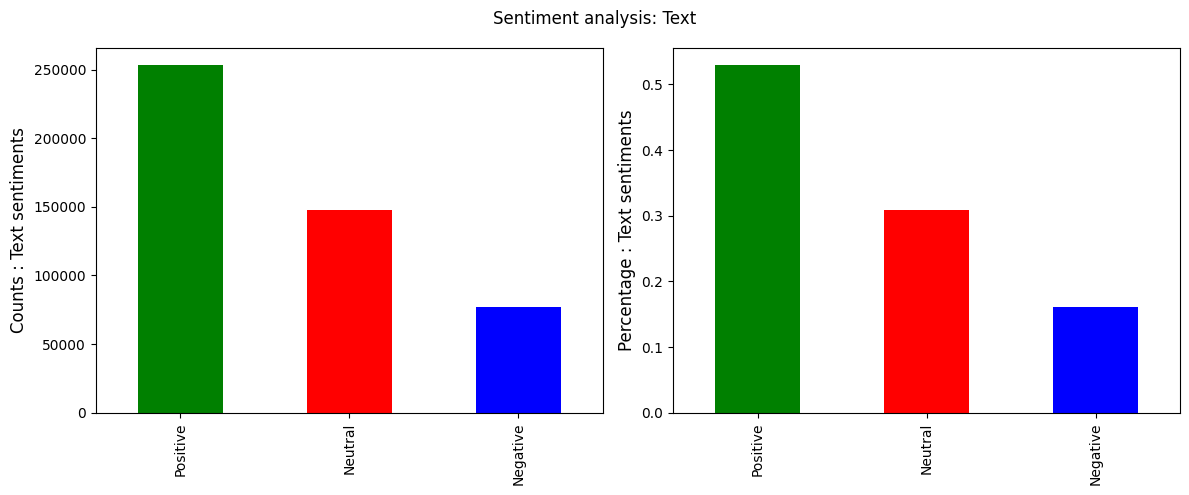

In [ ]:
df['text_sentiment'] = df['processed_content'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'text_sentiment', 'Text')

In [ ]:
df.head(10)

,Unnamed: 0,Date,Tweet,Url,User,UserCreated,UserVerified,UserFollowers,UserFriends,Retweets,Likes,Location,Description,processed_content,text_sentiment
0,0,2023-04-08,#ChatGPT If only there were a movie or somethi...,https://twitter.com/kirbydjohnson/status/16445...,kirbydjohnson,2012-07-29 22:57:46+00:00,False,50.0,76.0,0.0,0,NaN,NaN,if only there were a movie or something that ...,Neutral
1,1,2023-04-08,"Workshop Description: In this workshop, you wi...",https://twitter.com/UniversityWeb/status/16445...,UniversityWeb,2013-01-13 20:18:16+00:00,False,9056.0,387.0,0.0,0,NaN,"University webinars, speech videos, & news for...","workshop description: in this workshop, you wi...",Positive
2,2,2023-04-08,New Post at AiNewsDrop!\n\nChatGPT is a doctor...,https://twitter.com/AiNewsDrop/status/16445436...,AiNewsDrop,2022-01-19 06:25:45+00:00,False,276.0,313.0,0.0,0,NaN,I'm up almost 24/7 hunting for AI News\n\nWith...,new post at ainewsdrop! chatgpt is a doctor no...,Neutral
3,3,2023-04-08,OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...,https://twitter.com/tubeblogger/status/1644543...,tubeblogger,2013-06-25 01:42:59+00:00,False,312.0,293.0,0.0,0,The Internet,"Exploring the Best Of The Web. Tech, Games, Ar...",openai’s gpt-4 just got supercharged!,Neutral
4,4,2023-04-08,"""Classical art"" is struggling - not changed th...",https://twitter.com/majorradic/status/16445432...,majorradic,2011-12-12 01:29:15+00:00,False,522.0,684.0,0.0,2,Beograd Navodni,Mediji i milosrdje\n\n ...,"""classical art"" is struggling - not changed th...",Negative
5,5,2023-04-08,Alibaba invites businesses to trial 'ChatGPT r...,https://twitter.com/gadgetsnow/status/16445430...,gadgetsnow,2010-07-29 10:32:28+00:00,True,90392.0,56.0,0.0,0,New Delhi,The official technology news website of The Ti...,alibaba invites businesses to trial 'chatgpt r...,Neutral
6,6,2023-04-08,Trying to stop students from using #AI and #ch...,https://twitter.com/Sherab_Taye/status/1644542...,Sherab_Taye,2010-05-10 12:40:40+00:00,False,338.0,53.0,0.0,0,World,Musician // Thinker // Metaphysical Dandy // f...,trying to stop students from using and is like...,Negative
7,7,2023-04-08,I Asked ChatGPT's AI Chatbot How Can I Earn Cr...,https://twitter.com/cryptoccentral/status/1644...,cryptoccentral,2023-01-27 00:12:12+00:00,False,1.0,2.0,0.0,2,United States,Get the latest updates and insights on the cry...,i asked chatgpt's ai chatbot how can i earn cr...,Neutral
8,8,2023-04-08,Gugenka team has created a fun Customize new p...,https://twitter.com/kiradragonp/status/1644542...,kiradragonp,2010-07-03 19:13:52+00:00,False,895.0,635.0,0.0,1,Canada,"Mad Scientist,Overseas Partnership,Tech Direct...",gugenka team has created a fun customize new p...,Positive
9,9,2023-04-08,https://t.co/cDAXMevBtr\nThe race to develop #...,https://twitter.com/CDOTrends/status/164454134...,CDOTrends,2018-03-10 10:19:45+00:00,False,1051.0,2439.0,0.0,1,Hong Kong,Today's insights for digital leaders of tomorr...,the race to develop models with instruction-f...,Neutral


In [ ]:
tweets_agg_df = df.groupby(["Date", "text_sentiment"])["Tweet"].count().reset_index()
tweets_agg_df.columns = ["Date", "text_sentiment", "count"]

In [ ]:
def plot_time_variation(df, x='Date', y='count', hue=None, size=1, title="", is_log=False):
    sns.set(style="whitegrid")
    paper_rc = {'lines.linewidth': 3, 'lines.markersize': 20}
    sns.set_context("paper", rc = paper_rc)
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()

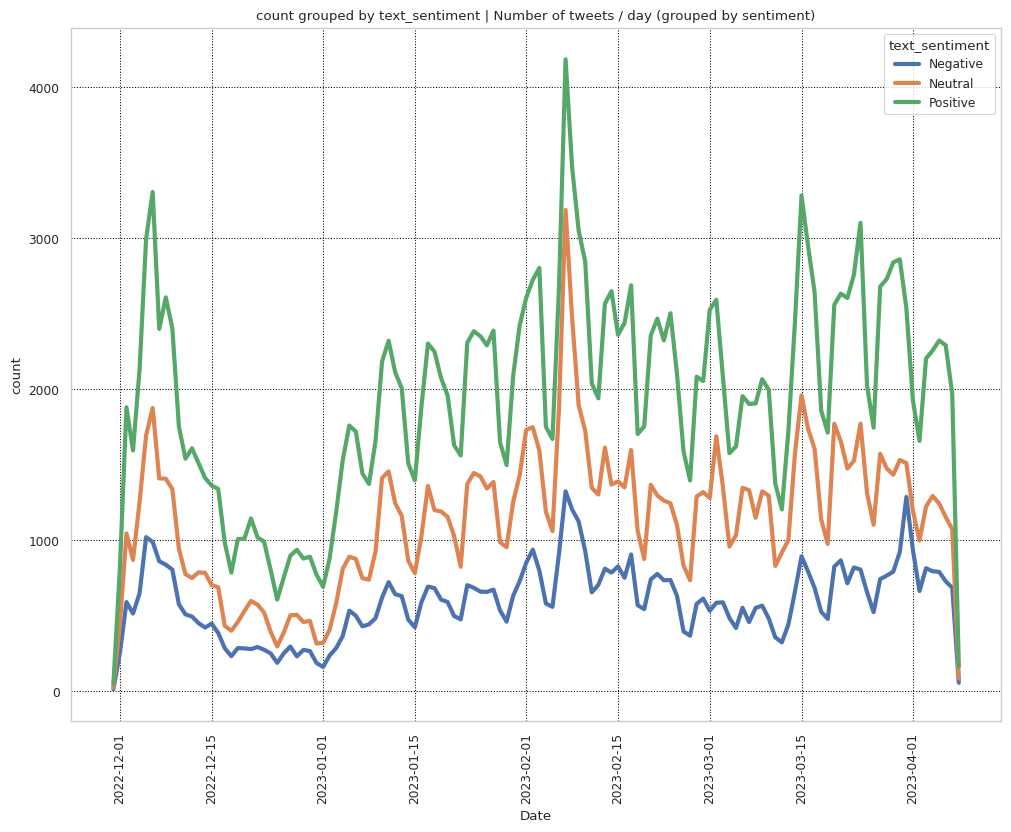

In [ ]:
plot_time_variation(tweets_agg_df, x='Date', hue="text_sentiment", title="Number of tweets / day (grouped by sentiment)",size=3)

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

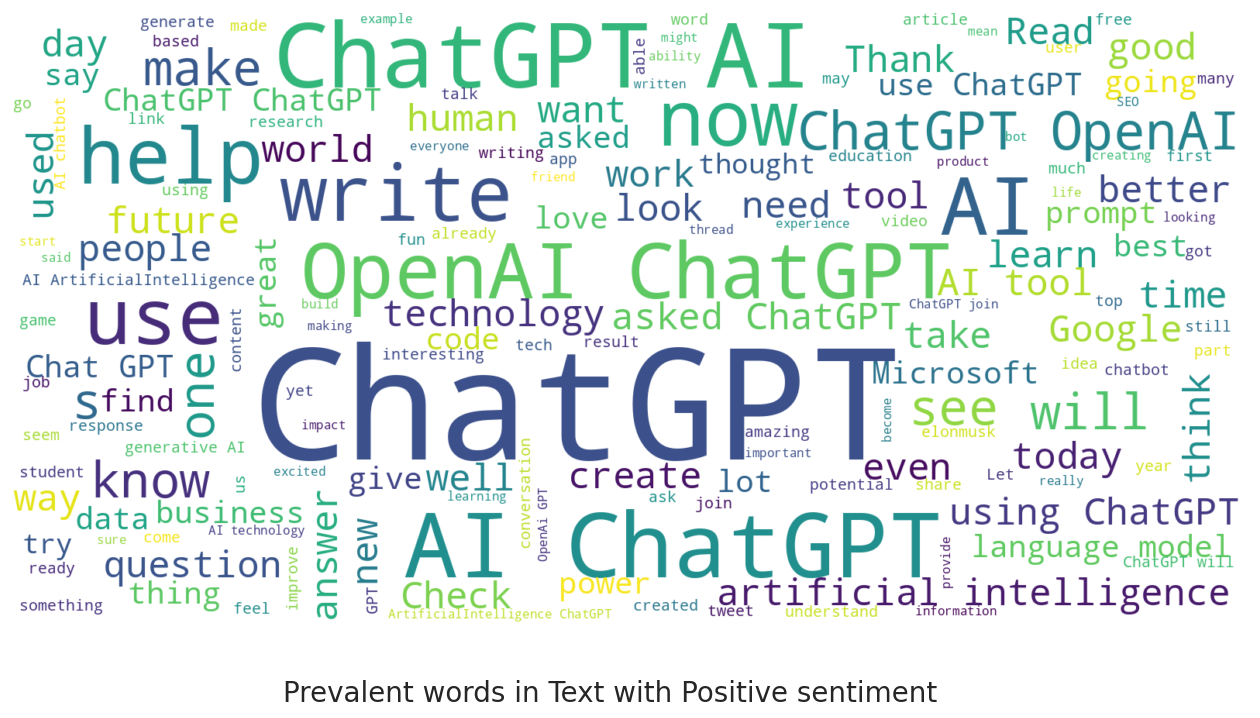

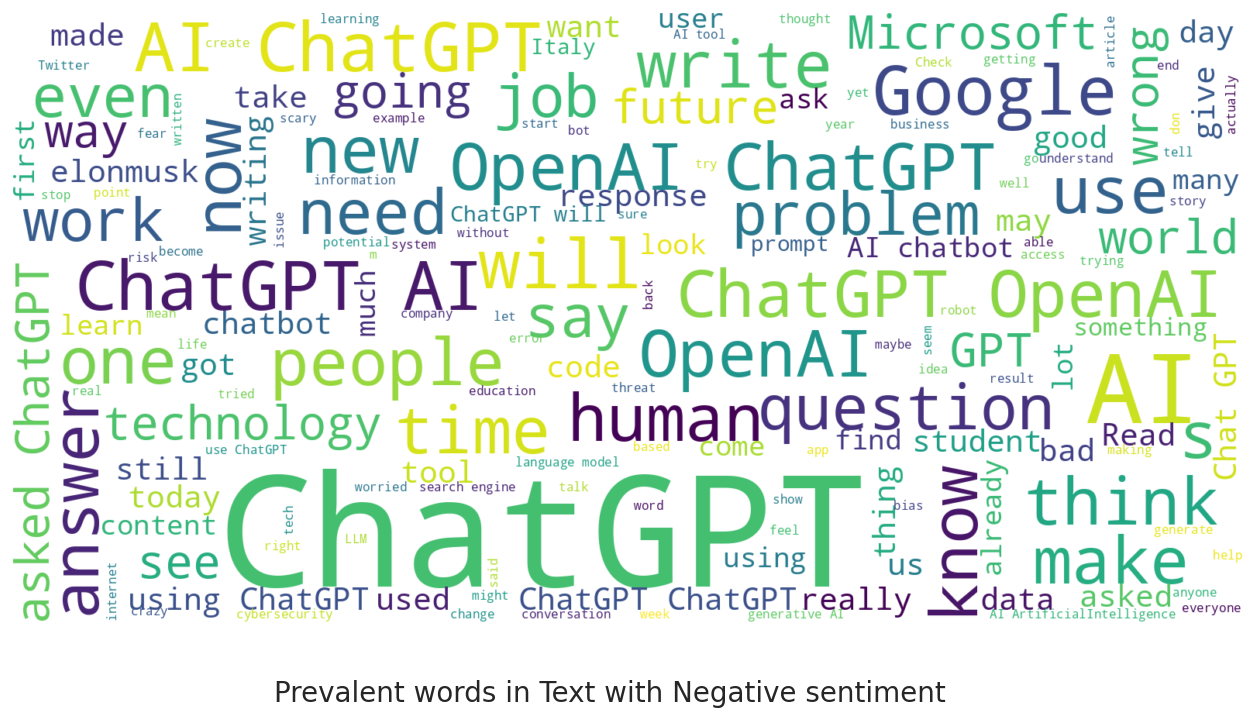

In [ ]:
show_wordcloud(df.loc[df['text_sentiment']=="Positive", 'Tweet'], title = 'Prevalent words in Text with Positive sentiment', mask=None)
show_wordcloud(df.loc[df['text_sentiment']=="Negative", 'Tweet'], title = 'Prevalent words in Text with Negative sentiment', mask=None)

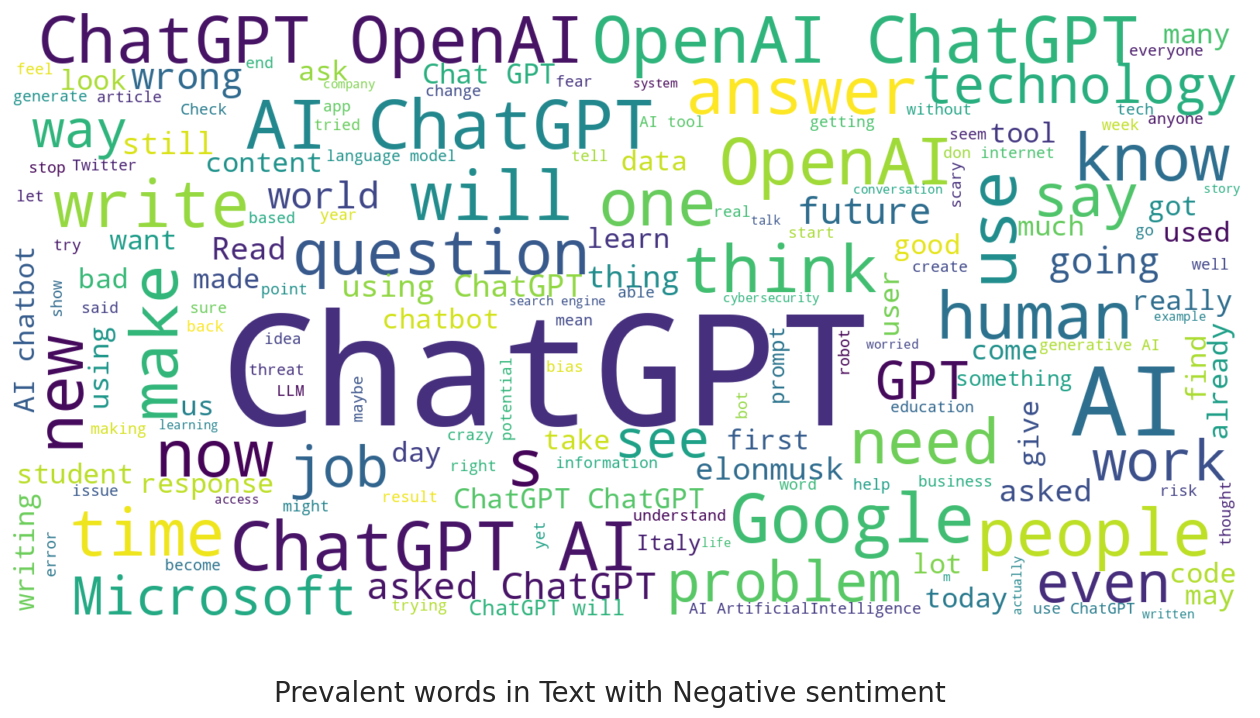

In [ ]:
show_wordcloud(df.loc[df['text_sentiment']=="Negative", 'Tweet'], title = 'Prevalent words in Text with Negative sentiment', mask=None)

In [ ]:
country_list = []

for row in df['Location']:
  if type(row)==float:
    row = str(row)
  country_list.append(row.split(', ')[-1])

df["Country"] = pd.Series(country_list)

In [ ]:
df = df[df.Country != 'nan']

In [ ]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [ ]:
for i in df.index:
    if df.at[i,'Country'] in us_state_to_abbrev.keys() or df.at[i,'Country'] in us_state_to_abbrev.values():
        df.at[i, 'Country'] = 'USA'
    else:
        df.at[i, 'ifor'] = 'USA'

<ipython-input-38-17a4e176ec69>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for i in df.index:
  if df.at[i,'Country']=='United States':
    df.at[i, 'Country'] = 'USA'
  elif df.at[i,'Country']=='London' or df.at[i,'Country']=='England' or df.at[i,'Country']=='UK':
    df.at[i, 'Country'] = 'United Kingdom'

In [ ]:
countries = df["Country"].value_counts()
countries_new = countries[:9]
print(countries_new)

USA               85247
India             24343
United Kingdom    21129
Canada             4741
Germany            4536
Global             3650
Pakistan           3544
Australia          3495
France             3380
Name: Country, dtype: int64


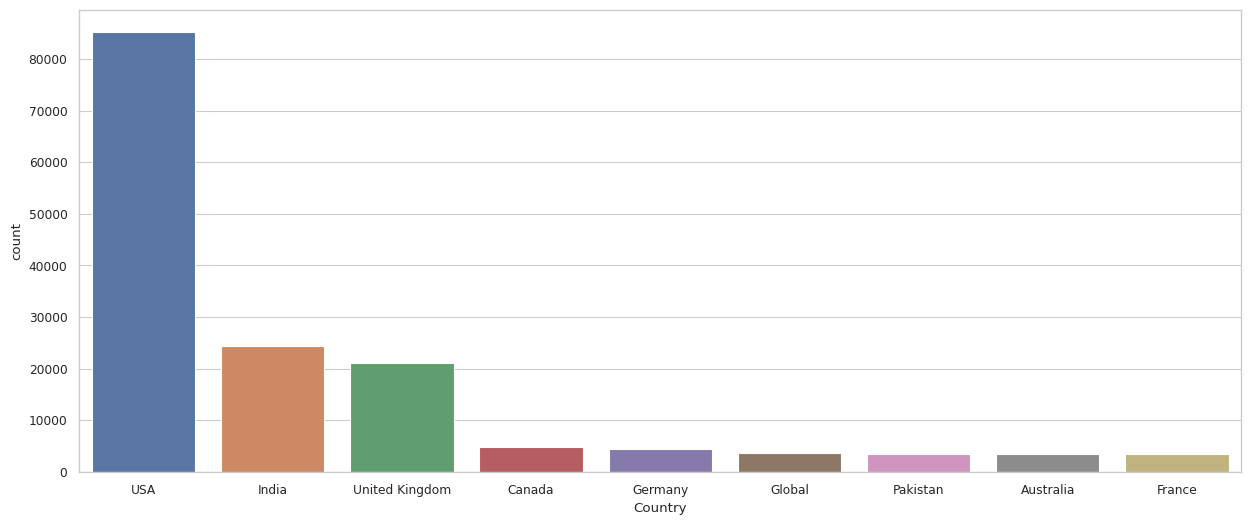

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Country', order=df["Country"].value_counts().index[:9])
plt.show()

In [ ]:
#df.head(10)

In [ ]:
tweets_agg_df = df.groupby([ "Country", "Date","text_sentiment"])["Tweet"].count().reset_index()
tweets_agg_df.columns = ["Country","Date", "text_sentiment", "count"]

In [ ]:
#tweets_agg_df.sort_values(by=['Country'], ascending=False)

,Country,Date,text_sentiment,count
137519,🫥,2023-02-13,Negative,1
137518,🫥,2023-01-29,Positive,1
137517,🪬,2023-04-05,Positive,1
137516,🪩,2023-02-26,Neutral,1
137515,🪩,2023-02-10,Negative,1
...,...,...,...,...
25,,2023-03-30,Positive,1
26,,2023-03-31,Neutral,2
27,,2023-04-05,Neutral,1
28,,2023-04-06,Negative,1


In [ ]:
india_df = tweets_agg_df[tweets_agg_df["Country"]=="India"]

In [ ]:
usa_df = tweets_agg_df[tweets_agg_df["Country"]=="USA"]

In [ ]:
uk_df = tweets_agg_df[tweets_agg_df["Country"]=="United Kingdom"]

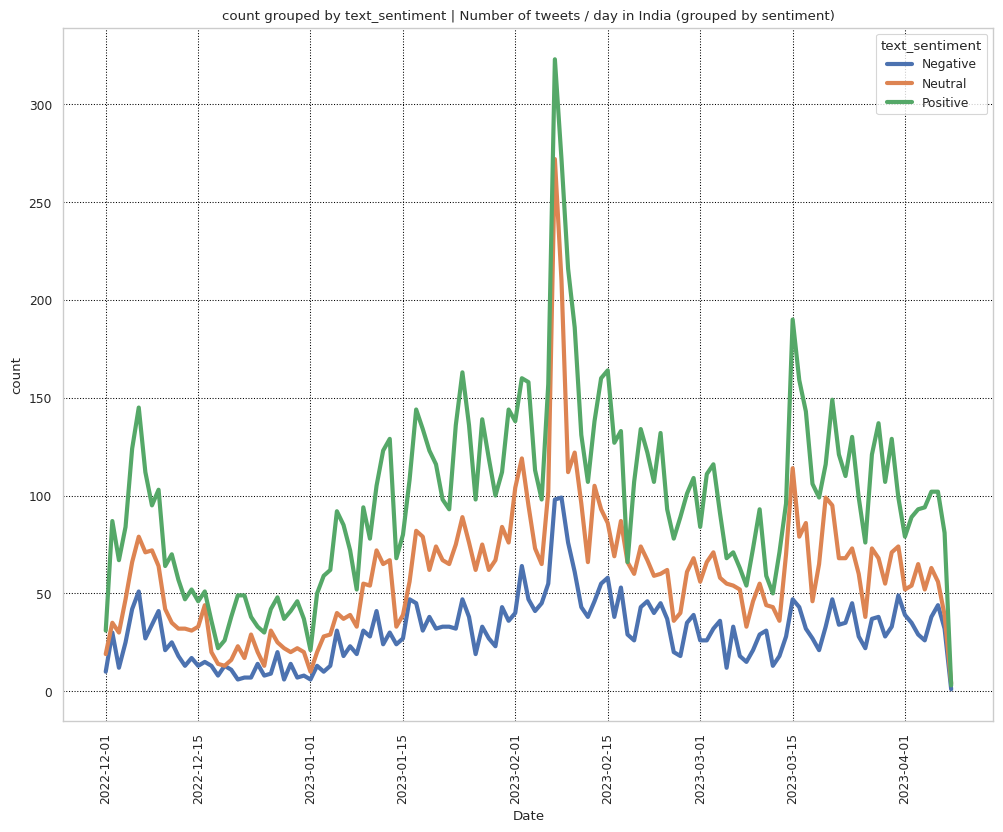

In [ ]:
plot_time_variation(india_df, x='Date', hue="text_sentiment", title="Number of tweets / day in India (grouped by sentiment)",size=3)

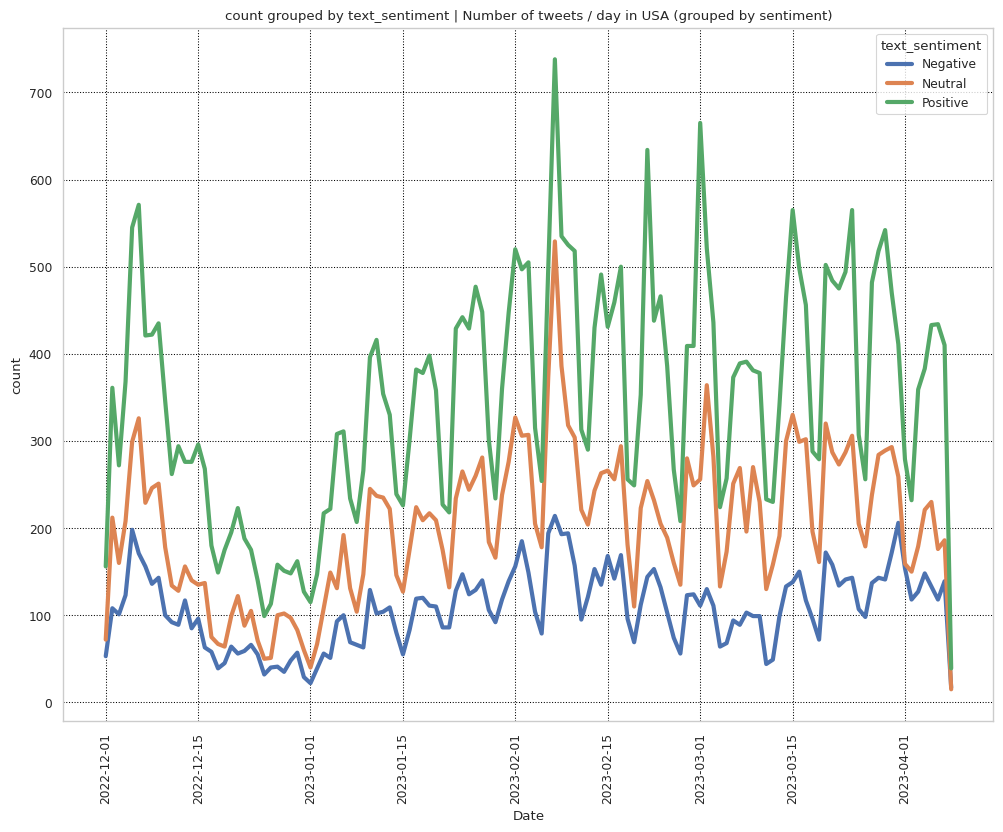

In [ ]:
plot_time_variation(usa_df, x='Date', hue="text_sentiment", title="Number of tweets / day in USA (grouped by sentiment)",size=3)

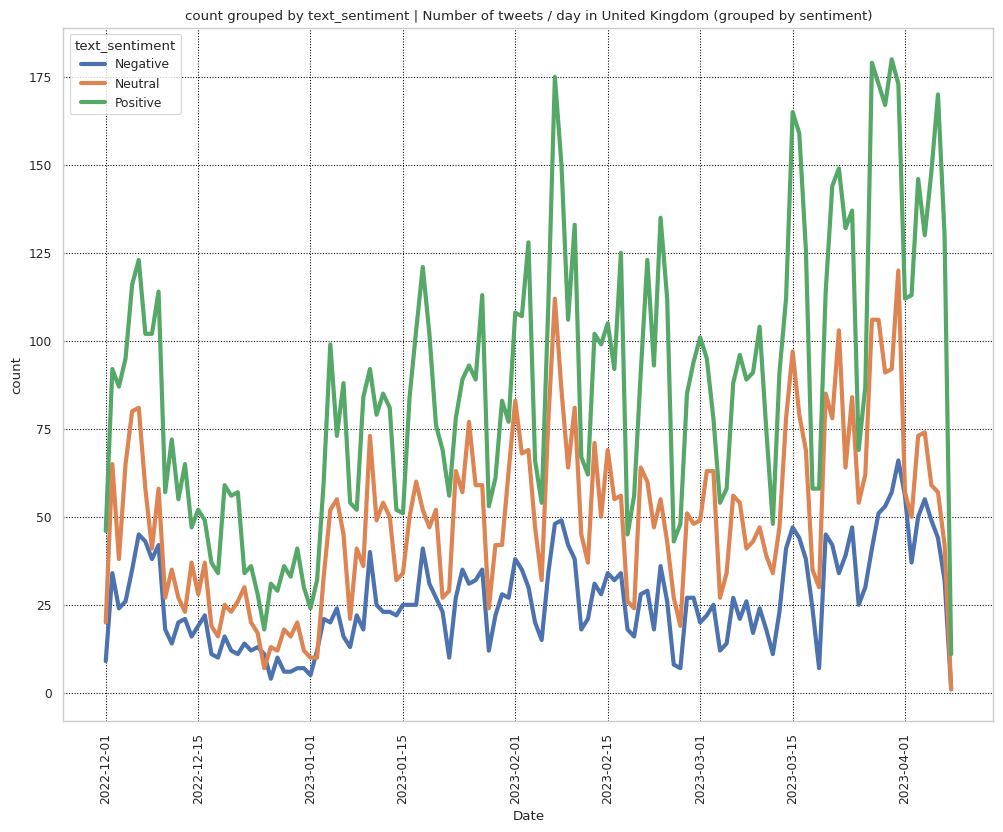

In [ ]:
plot_time_variation(uk_df, x='Date', hue="text_sentiment", title="Number of tweets / day in United Kingdom (grouped by sentiment)",size=3)

In [ ]:
tweets_agg_df_countries = tweets_agg_df[(tweets_agg_df["Country"]=="United Kingdom") | (tweets_agg_df["Country"]=="USA")
| (tweets_agg_df["Country"]=="India")]

#tweets_agg_df_countries = tweets_agg_df_countries[['Country', 'text_sentiment', 'count']]

In [ ]:
print(tweets_agg_df_countries)

               Country text_sentiment  count
48441            India       Negative     10
48442            India        Neutral     19
48443            India       Positive     31
48444            India       Negative     30
48445            India        Neutral     35
...                ...            ...    ...
113124  United Kingdom        Neutral     42
113125  United Kingdom       Positive    130
113126  United Kingdom       Negative      1
113127  United Kingdom        Neutral      1
113128  United Kingdom       Positive     11

[1161 rows x 3 columns]


<ipython-input-125-30d22f91a9e7>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



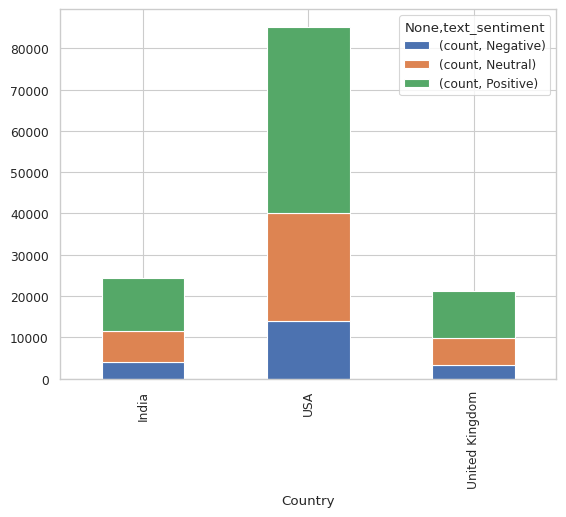

In [ ]:
tweets_agg_df_countries = tweets_agg_df_countries.groupby(["Country","text_sentiment"]).sum().unstack().plot(kind='bar', stacked=True)